# Case Study 1
### Case Study: How Does a Bike-Share Navigate Speedy Success?

### Introduction
Welcome to the Cyclistic bike-share analysis case study! In this case study, we will work for a fictional company, Cyclistic, and find out the useful insights to answer the key business questions, we will follow the steps of the data analysis process: **ask, prepare, process, analyze, share, and act**.

### Scenario
Moreno, The director of marketing at Cyclistic, a bike share company in chicago believes that company’s future success depends on maximizing the number of annual memberships. we have to identify trends how casual riders and annual members use Cyclistic bikes and design new marketing strategy and recommendations to convert casual riders into annual members. So the recommendations must be backed up with compelling data insights and professional data visualizations for Cyclistic executives approval.

### About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo tracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members willbe key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

### Goal
Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

### Ask
Three questions will guide the future marketing program:

   *How do annual members and casual riders use Cyclistic bikes differently?*

   *Why would casual riders buy Cyclistic annual memberships?*

   *How can Cyclistic use digital media to influence casual riders to become        members?*

*Question to answer:*

   *How do annual members and casual riders use Cyclistic bkes differently?


   *What is the problem you are trying to solve?*

   *Ans* I’m trying to come up with insights about Cyclistic bike users trends          that how do the usage of bikes of annual members and casual riders              differs.

   *How can your insights drive business decisions?*

   *Ans* This is the world full of data, data contains all the informations              we need about the business process. We need to extract useful insights          from the data we have.

#### Key tasks

**Identify the business task**

Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Key stakeholders**

**Lily Moreno** : The director of marketing . Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

**Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

**Cyclistic executive team**: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

**Deliverable**

Design marketing strategies aimed at converting casual riders into annual members.

### Prepare
We will use Cyclistic’s historical trip data to analyze and identify trends. There is 12 months data in 12 csv files. The datasets have a different name because Cyclistic is a fictional company. The data has been made available by Motivate International Inc. under this license.). This is public data that we can use to explore how different customer types are using Cyclistic bikes.

I am using python for data cleaning and aggregation as it is convenient and fast as compared to R.

In [ ]:
# Importing important libraries
import pandas as pd
import numpy as np

In [ ]:
# loading dataset (This is already combined in 1 csv file)
df = pd.read_csv("e:/downloads/bike_ride22.csv")

In [ ]:
df.columns

**Description of data sources:** <br>
This data was downloaded from Lyft Bikes and Scooters, LLC (“Bikeshare”) operates the City of Chicago’s (“City”) Divvy bicycle sharing service url (https://divvy-tripdata.s3.amazonaws.com/index) and same is also available in kaggle in 12 csv files and later on combined to a single csv file for further analysis.  We can not doubt the credibility of this data is it is coming from the credible sources.

**Data integrity:** <br>
This data is from the bike share company services and is comprhensive and well structured.

**Tools:**<br>
In this analyses process I'll be using python for cleaning and organizing the data, and then I'll use Tableu for data visualization. 

### Process
Let's Begin the process step in our data analyses

Initial total observations = 5,883,043 <br >
Null values counts = 946,303 deleted from columns <br >                                             ['start_station_name'] = 884365 ,                                                     <br >['start_station_id'] = 884365,                                                           <br >['end_station_name'] = 946303,                                                           <br >['end_station_id'] = 946303 ,                                                                 <br >['end_lat'] = 5727,                                                                                 <br >['end_lng'] = 5727                                                                               <br >total removed = 1,322,897                                                                       <br >substracting total observations with all null values  = 4,560,146                               <br >there were no duplicate observations


*Convering 2 columns of date and time to datetime data type*

I calculated trip length by substracting *ended_at* with *started_at* variables and stored in *trip_length_minutes* variable

In [ ]:
# getting trip length
df["trip_length_minutes"]=(df.ended_at-df.started_at).astype('timedelta64[m]')

I made 2 python dictionaries for days and months corresponding to their sequencial number and mapped both to *df['day']* and *df['month']* series.

In [ ]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
dm_mapping={
    1: 'January', 
    2: 'Febraury', 
    3: 'March', 
    4: 'April', 
    5: 'May',
    6: 'June', 
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'}

In [ ]:
day = df["ended_at"].dt.dayofweek
df["day"] = day.map(dw_mapping)
month = df["started_at"].dt.month 
df["month"] = month.map(dm_mapping)
df["hour"] =df['started_at'].dt.hour

I extracted start and end time,date of trips and made columns for each variable in df.

In [ ]:
#extracting time and date

df["start_time"]=df["started_at"].dt.time
df["end_time"]=df["ended_at"].dt.time
df["start_date"] = df["started_at"].dt.date
df["end_date"] = df["started_at"].dt.date

I deleted observations with less than 0 or equal to 0 trip length.
deleted trip length greater than 1440 minutes( 1440 minutes 24 hours) if start and end dates were same.
found and deleted 190 observations's *start* and *end* time as well as *start* and *end stations* were same.  


In [ ]:
trip_if_0 =df[df["trip_length"]<= 0].index # determining wether we have less than or equal to 0 length rides
df.drop(trip_if_0,inplace = True) # Removing these data observations
to_drop=df[(df["trip_length"]>1440)&(df["start_date"]==df["end_date"])].index
df.drop(to_drop,inplace=True)


Combining *start_station_name* with *end_station_name* and storing in *df['location']* variable. 

In [ ]:
# combining start and end station names.
df["start_station_name"]=df["start_station_name"].str.strip()
df["end_station_name"]=df["end_station_name"].str.strip()
df["location"] = df["start_station_name"].str.cat(df["end_station_name"],sep=" To ")
df.rename(columns = {"location": "start_end_station"}, inplace = True)

**Data cleaning ensurity:**<br>
I have checked for following ambiguities:
   <br>i)if the data has null or duplicate values.  
   <br>ii)The data values should be harmonized with the observations and every point should justify itself    with the corresponding data points.
   <br>iii)Trip lenght should not exceed *1440* minutes on th same *start* and *end* dates. 
   <br>iv)Trip length should not be less than or equal to zero.

<br>After taking these steps, I verified that the data is cleaned and ready for further analyses. 


### Analyze
Now that the data is stored appropriately and has been prepared for analysis, let's start putting it to work.

In [ ]:
# top 10 popular trip starting stations
df["start_station_name"].value_counts().sort_values(ascending = False).head(10)

In [ ]:
perc_of_stations=(df["start_station_name"].value_counts()*100)/sum(df["start_station_name"].value_counts())

In [ ]:
perc_of_stations.head(10)

In [ ]:
perc_of_end_stations=(df["end_station_name"].value_counts()*100)/sum(df["start_station_name"].value_counts())

In [ ]:
perc_of_end_stations.head(10)

In [ ]:
df.groupby(['member_casual'])['start_end_station'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
groupby = df.groupby(['member_casual'] )['start_station_name'].value_counts().sort_values(ascending=False)
groupby


In [ ]:
# top 10 popular trip ending stations
df["end_station_name"].value_counts().sort_values(ascending = False).head(10)

In [ ]:
# top 10 populart locations of start to end stations combined
df["location"].value_counts().sort_values(ascending = False).head(10)

In [ ]:
df.groupby(['member_casual'])['trip_length_minutes'].value_counts().sort_values(ascending=False).head(20)

In [ ]:
df.groupby(['member_casual'])['trip_length_minutes'].max()

In [ ]:
df.groupby(['member_casual'])['trip_length_minutes'].min()

In [ ]:
df.groupby(['member_casual'])['trip_length_minutes'].mean()

In [ ]:
day_mode = df.groupby(['member_casual'])['day'].agg(pd.Series.mode)
month_mode = df.groupby(['member_casual'])['month'].agg(pd.Series.mode)
time_mode = df.groupby(['member_casual'])['hour'].agg(pd.Series.mode)
trip_length_mode = df.groupby(['member_casual'])['trip_length_minutes'].agg(pd.Series.mode)
location_mode = df.groupby(['member_casual'])['location'].agg(pd.Series.mode)
print(time_mode ,+
     day_mode ,+
     month_mode,+
     trip_length_mode,+
     location_mode)

In [ ]:
df.groupby(['member_casual'])['trip_length_minutes'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
df.groupby(['member_casual'])['hour'].value_counts().sort_values(ascending=False).head(20)

In [ ]:
df.groupby(['member_casual'])['rideable_type'].value_counts().sort_values(ascending=False)

In [ ]:
df.groupby(['member_casual'])['month'].value_counts().sort_values(ascending=False)

In [ ]:
#top 20 trip starting stations7*
df.groupby(["start_station_name"])['member_casual'].value_counts().sort_values(ascending=False).head(20)

In [ ]:
#top 20 trip ending stations
df.groupby(["end_station_name"])['member_casual'].value_counts().sort_values(ascending=False).head(20)

### Summary 
The *Streeter Dr & Grand Ave* is the most popular station for casual riders, **77%** of the rides were by casual riders . while at the other hand *Kingsbury St & Kinzie St* is the most popular station for annual member **74%** rides were taken from this station. Combining starting and ending stations I observed that **9128** rides were taken by casual riders from and to *Streeter Dr & Grand Ave*, its seems casual riders take rides for enjoyment. at the other hand annual members's popular stations  are from *Ellis Ave & 60th St* To *University Ave & 57th St*.

Average trip length by annual members is **12.27** minutes while casual riders take longer rides than annual members, their average trip lenght is **24.70** minutes. the average time of taking ride is **5 o'clock** in the evening for both annual members and casual riders. **Saturday** is the day for casual riders. Additionally, trip  lengths differs by days also maximum trip length is around 25 minutes in weekends by casual riders, yet in weekdays it is around 19 to 22 minutes, likewise annual members are opposite to casual riders, their trip lengths are around 12 to 14 minutes in whole week.  Most of the rides on Saturday were taken by casual riders and at the other hand **Wednesday** is the day for annual members as they take most of the rides on this day.

There seems to be the influence of weather conditions over bike ride trends. Because most of the rides are taken from **May** to **October** by both annual members and casual riders. These months are considered to be of summer season, so as much the temperature rises the number of rides as well as trip length increases by both annual members and casual riders. 

Annual members and casual members trip length is very different, most of the trips by annual members were around **4** minutes while casual riders trips were around **7** minutes. Most of the rides by members are taken from **8 o'clock** in the morning to **5 o'clock** in the evening, probably annual members take rides for commuting from home to work and vice versa. while most of the rides by casual riders are from **3 o'clock** in the afternoon to **6 o'clock** in the evening.

If we talk about rideable types of the bike so the data reveals that **Classic bikes** are popular in both annual members and casual riders. its is surprising that annual members did not take a single ride in **docked bikes**.


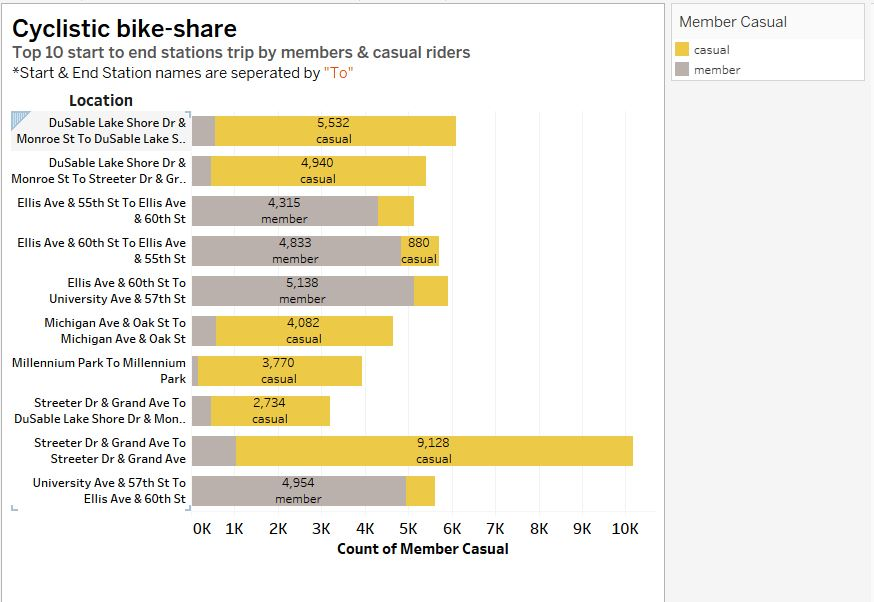

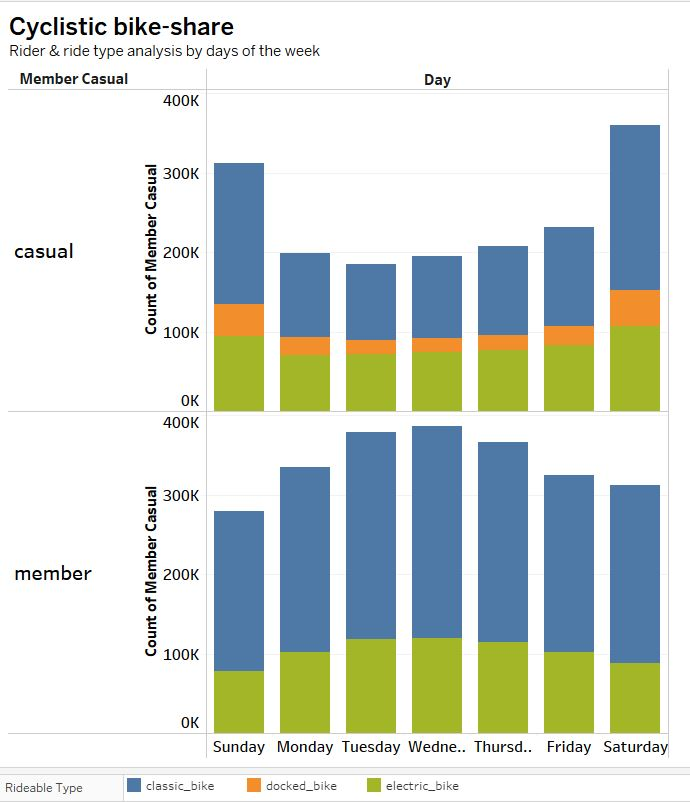

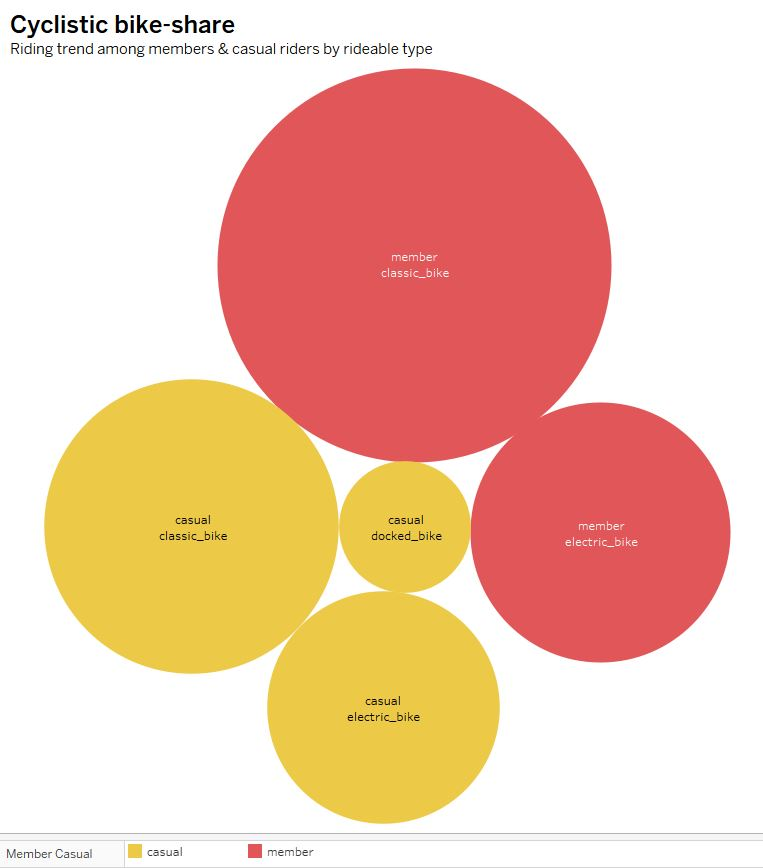

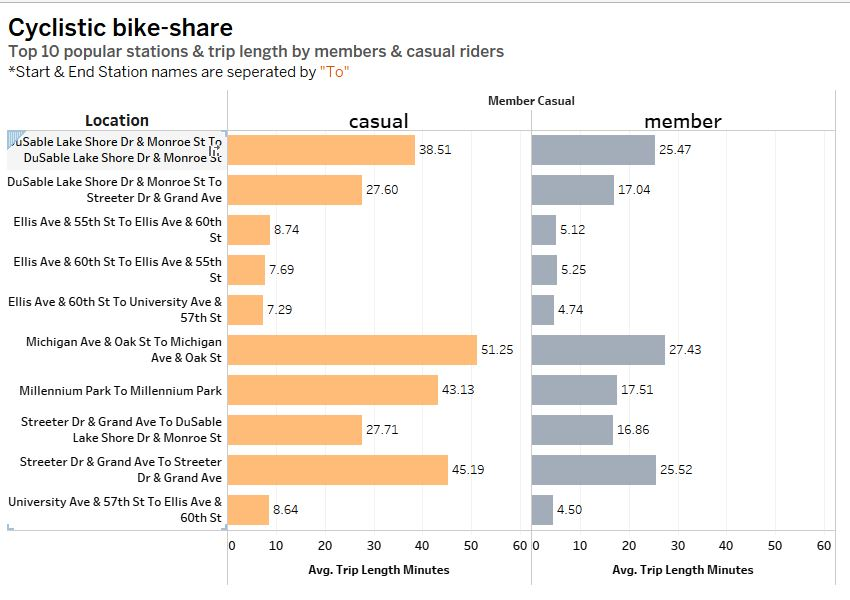

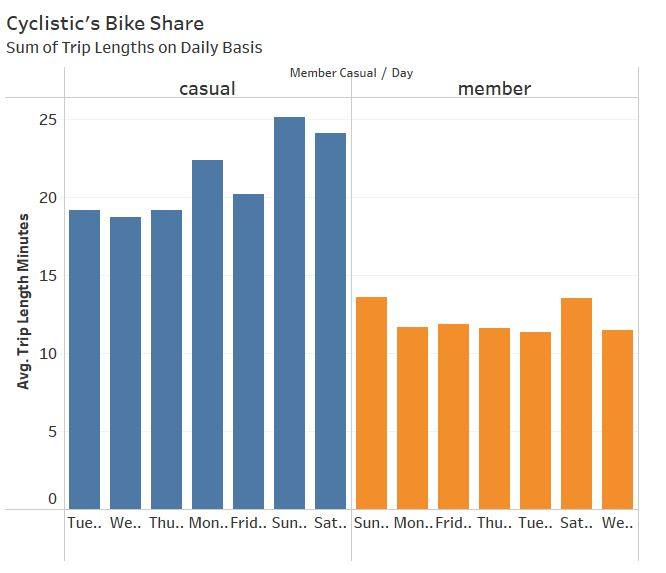


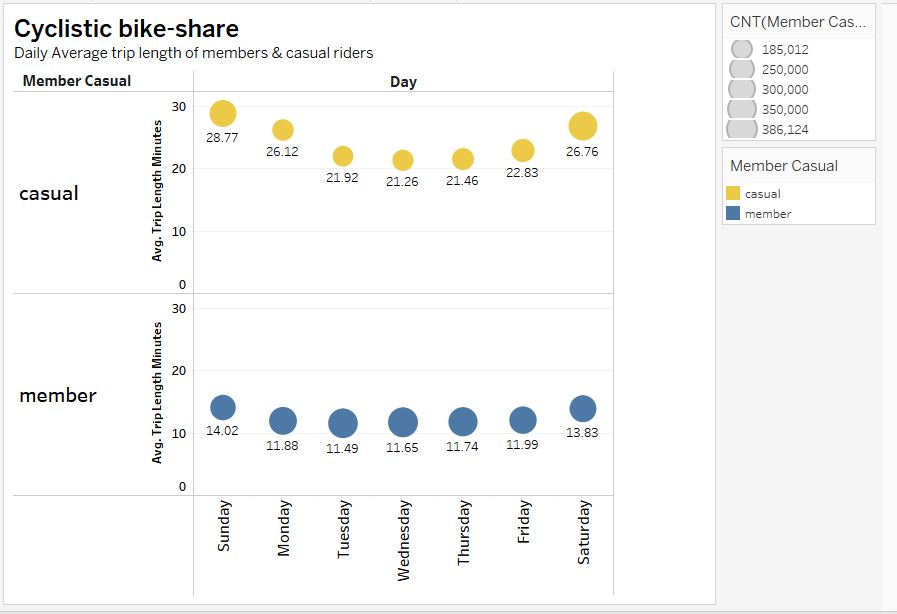


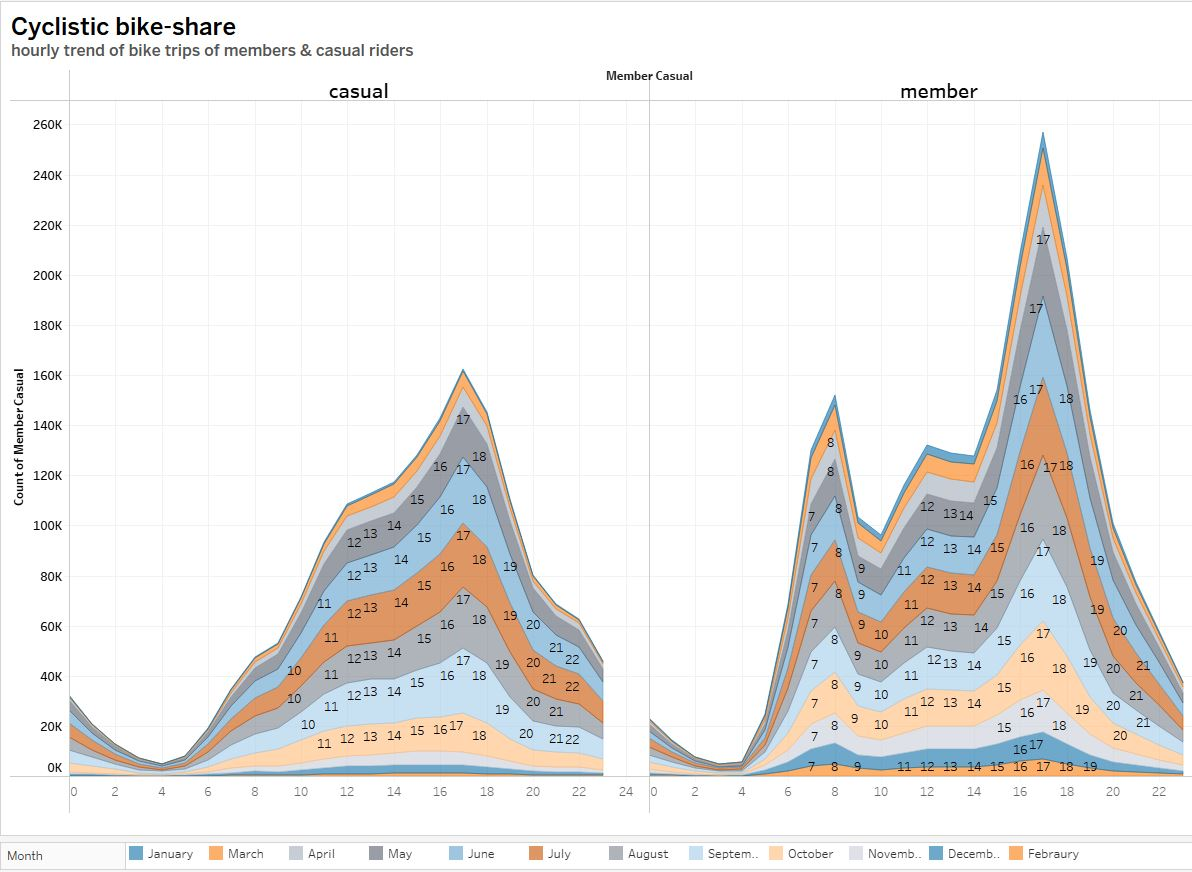

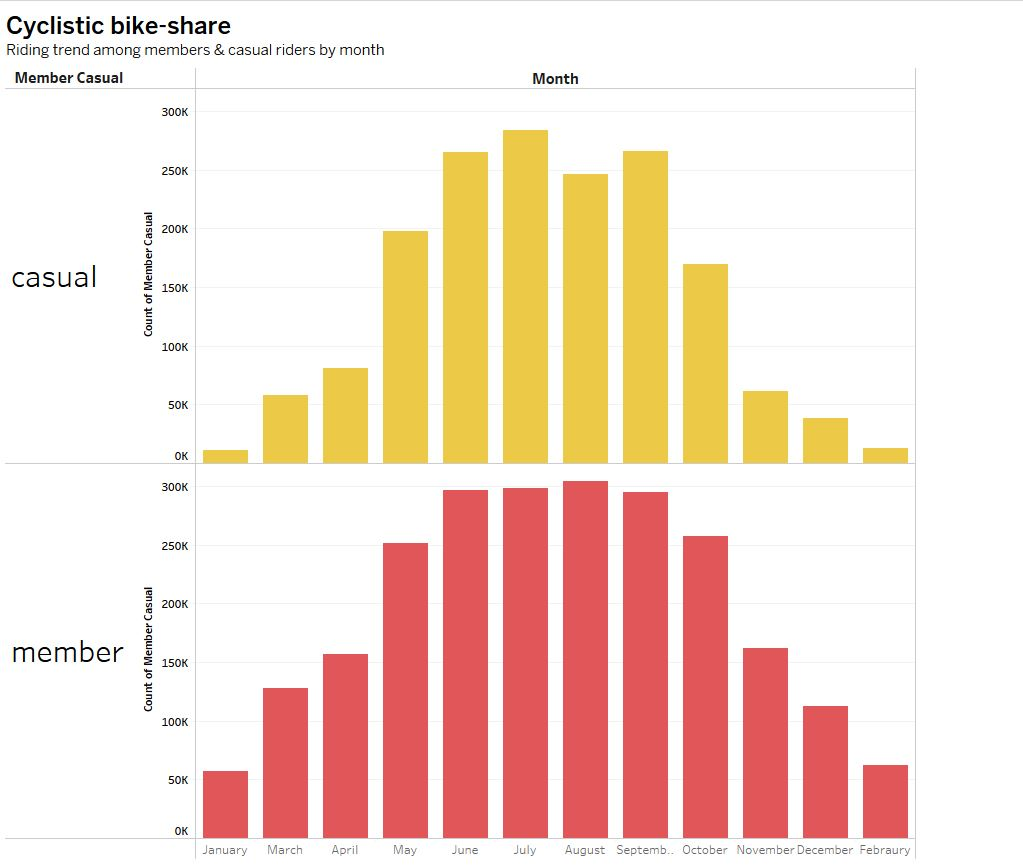

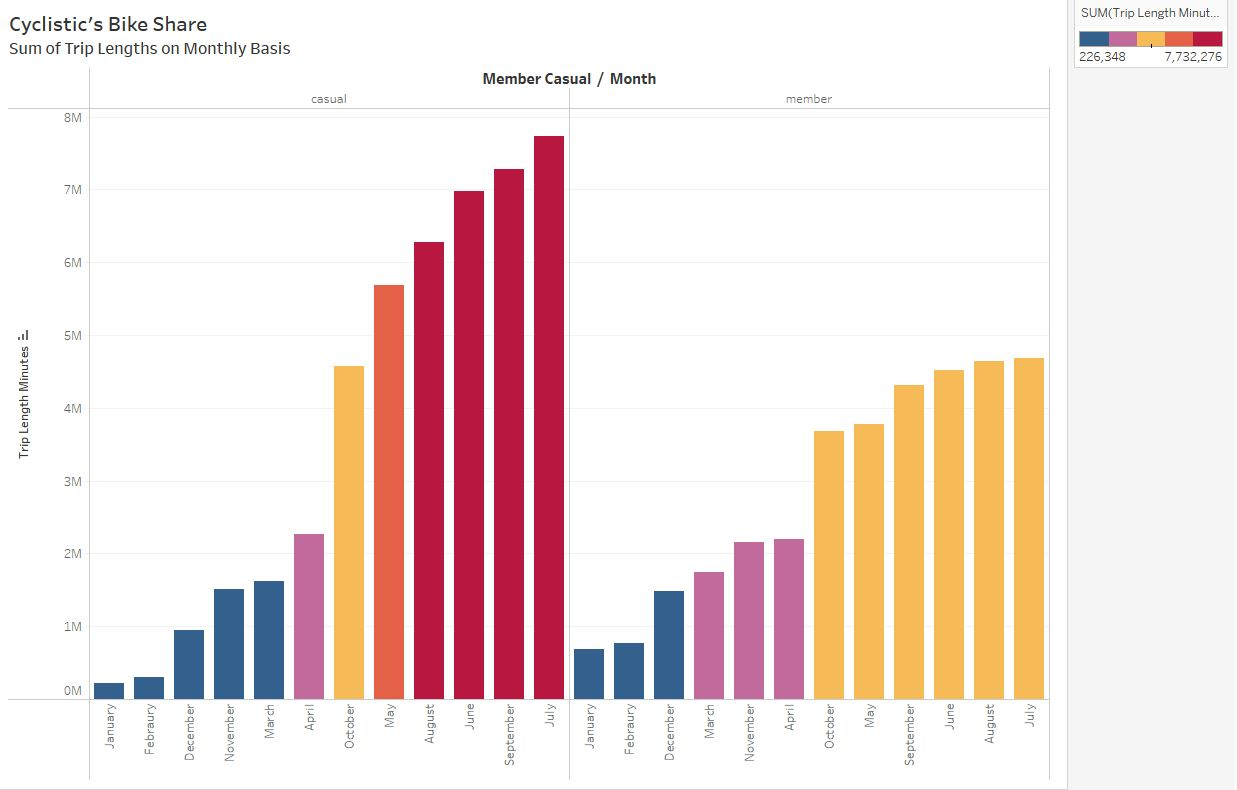

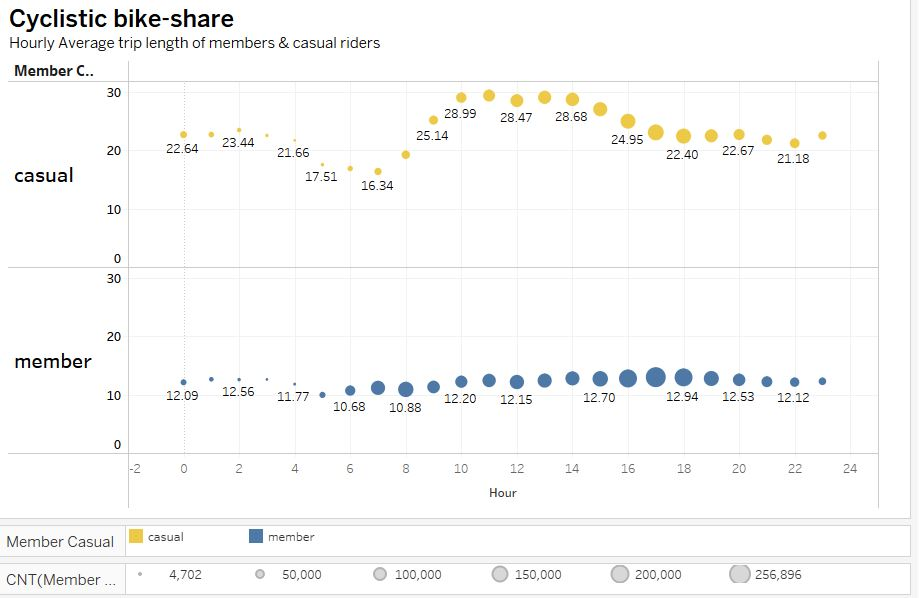

### Act

#### Conclusion:

After all the observations and finding insight from these, we have learned that annual member take riders take rides to commute to work, college or University, while the casual riders take riders for leisure. considering that I came up with these recommendations.

1. There can be an other membership package for casual riders who ride in summer due to hot weather, it might attract them to get a membership.
2. Most of the casual members ride across sight seeing places like, lakes, parks sea shores. So special offers for these riders might convert them to members.
3. The casual riders mostly ride in weekends, So I would suggest marketing team to come up with promotions related to weekends also.


